In [36]:
from google.colab import files

In [37]:
import io

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Upload Data

In [39]:
uploaded = files.upload()

Saving credit_risk_dataset.csv to credit_risk_dataset.csv


#Data check and Drop outliers

In [40]:
#Load the data
df = pd.read_csv(io.BytesIO(uploaded['credit_risk_dataset.csv']))
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [41]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [43]:
# If they are null
df.isnull().sum()


,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [44]:
# Drop null
df = df.dropna()


In [45]:
#Dublicate
df.duplicated().sum()


137

In [46]:
#Drop dublicate
df.drop_duplicates(inplace=True)

<ipython-input-46-4f7e1e87c37a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [47]:
#Count indexes where person_age - 15 is less than or equal to person_emp_length
##We make the assumption that people can work from the age of 15
counted = sum((df['person_age'] - 15) <=df['person_emp_length'])
print(counted)

660


In [48]:
# Get indexes where 'person_age' <= 'person_emp_length'
indexes_to_drop = df.index[(df['person_age'] - 15) <= df['person_emp_length']]

# Drop those indexes
df_1 = df.drop(indexes_to_drop)


In [49]:
counted = sum((df_1['person_age'] - 15) <=df_1['person_emp_length'])
print(counted)

0


In [50]:
# Unique values for the column 'person_age'
df_1['person_age'].unique()


array([ 21,  25,  23,  24,  26,  22, 144, 123,  20,  32,  34,  29,  33,
        28,  35,  31,  27,  30,  36,  50,  37,  39,  40,  43,  41,  46,
        38,  47,  42,  44,  48,  45,  49,  58,  65,  51,  53,  66,  57,
        59,  62,  54,  60,  55,  52,  61,  64,  70,  78,  69,  56,  73,
        63,  80,  84,  76,  67])

In [51]:
# Drop index where person_age >100
df_2 = df_1[df_1['person_age'] <= 100]

In [52]:
print(max(df_2['person_age']))

84


In [53]:
df_2.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [54]:
df_2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 27837 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  27837 non-null  int64  
 1   person_income               27837 non-null  int64  
 2   person_home_ownership       27837 non-null  object 
 3   person_emp_length           27837 non-null  float64
 4   loan_intent                 27837 non-null  object 
 5   loan_grade                  27837 non-null  object 
 6   loan_amnt                   27837 non-null  int64  
 7   loan_int_rate               27837 non-null  float64
 8   loan_status                 27837 non-null  int64  
 9   loan_percent_income         27837 non-null  float64
 10  cb_person_default_on_file   27837 non-null  object 
 11  cb_person_cred_hist_length  27837 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


In [55]:
df_2.describe().round(2)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,27837.00,27837.00,27837.00,27837.00,27837.00,27837.00,27837.00,27837.00
mean,27.79,66388.25,4.66,9640.60,11.05,0.22,0.17,5.84
std,6.21,51764.07,3.97,6333.23,3.23,0.41,0.11,4.06
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,39000.00,2.00,5000.00,7.90,0.00,0.09,3.00
50%,26.00,55560.00,4.00,8000.00,10.99,0.00,0.15,4.00
75%,30.00,80000.00,7.00,12400.00,13.48,0.00,0.23,8.00
max,84.00,2039784.00,41.00,35000.00,23.22,1.00,0.83,30.00


In [56]:
#Check index where loan_percent_income == 0
print(sum(df_2['loan_percent_income'] ==0))


7


In [57]:
# Drop index where loan_percent_income == 0
indexes_to_drop_2 =df_2.index[df_2['loan_percent_income'] == 0]
df_3 = df_2.drop(indexes_to_drop_2)
print(sum(df_3['loan_percent_income'] ==0))

0


In [58]:
#Check index where loan_int_rate == 0
print(sum(df_3['loan_int_rate'] ==0))

0


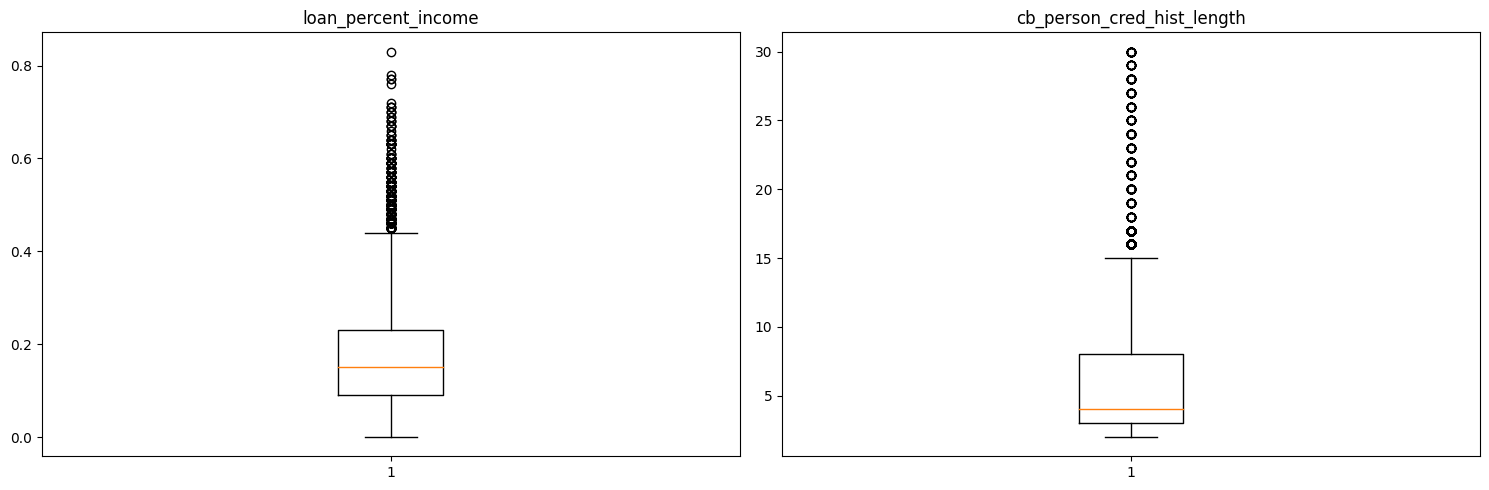

In [59]:
# Outliers in loan_percent_income, cb_person_cred_hist_length
columns_to_plot = ['loan_percent_income', 'cb_person_cred_hist_length']

fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 5))

for i, column in enumerate(columns_to_plot):
    axes[i].boxplot(df_2[column])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

<Axes: ylabel='loan_percent_income'>

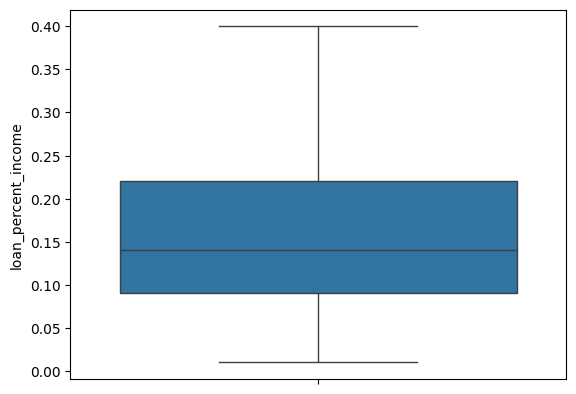

In [60]:
# Checking the value of outliers in loan_percent_income
outliers_of__loan_percent_income = df_3[df_3['loan_percent_income'] <= 0.40]
sns.boxplot(outliers_of__loan_percent_income['loan_percent_income'])

<Axes: ylabel='cb_person_cred_hist_length'>

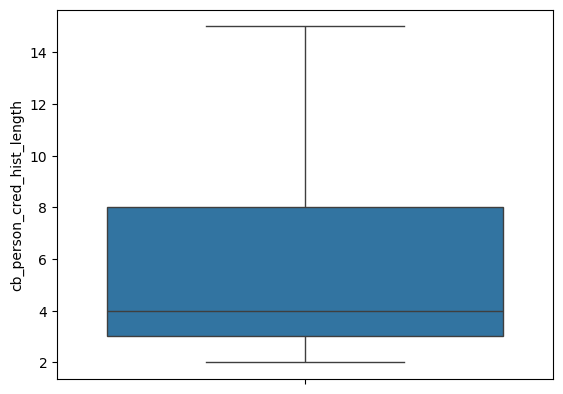

In [61]:
#Checking the value of outliers in cb_person_cred_hist_length
outliers_of__person_income = df_3[df_3['cb_person_cred_hist_length'] <= 15]
sns.boxplot(outliers_of__person_income['cb_person_cred_hist_length'])

In [62]:
from scipy import stats

# Calculate Z-score
df_3['z_score'] = stats.zscore(df_3['person_income'])

# Identify outliers
outliers = df_3[(df_3['z_score'] > 3) | (df_3['z_score'] < -3)]

print(f"Number of outliers: {outliers.shape[0]}")
print(outliers)


Number of outliers: 344
       person_age  person_income person_home_ownership  person_emp_length  \
15             23         500000              MORTGAGE                7.0   
33             25         306000                  RENT                2.0   
34             26         300000              MORTGAGE               10.0   
42             26         300000              MORTGAGE               10.0   
43             23         300000                   OWN                1.0   
...           ...            ...                   ...                ...   
32308          51         260000              MORTGAGE                1.0   
32497          63        1782000                  RENT               13.0   
32543          52         720000              MORTGAGE                1.0   
32544          58         780000              MORTGAGE                7.0   
32551          58         780000              MORTGAGE                7.0   

             loan_intent loan_grade  loan_amnt  loa

In [63]:
# Drop outliers from columns: cb_person_cred_hist_length, loan_percent_income
#Drop outlier from person_income
df_clean_person_income = df_3[(df_3['z_score'] <= 3) & (df_3['z_score'] >= -3)]
#Drop z_score column
df_drop_z_score = df_clean_person_income.drop(columns=['z_score'])
#Drop outliers from cb_person_cred_hist_length
df_clean_cb_person_cred_hist_length = df_drop_z_score[df_drop_z_score['cb_person_cred_hist_length'] <= 15]
#Drop outliers from loan_percent_income
df_clean_loan_percent_income = df_clean_cb_person_cred_hist_length[df_clean_cb_person_cred_hist_length['loan_percent_income'] <= 0.40]

#Shorter name
df_4 = df_clean_loan_percent_income = df_clean_cb_person_cred_hist_length[df_clean_cb_person_cred_hist_length['loan_percent_income'] <= 0.40]


In [64]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25635 entries, 1 to 32295
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  25635 non-null  int64  
 1   person_income               25635 non-null  int64  
 2   person_home_ownership       25635 non-null  object 
 3   person_emp_length           25635 non-null  float64
 4   loan_intent                 25635 non-null  object 
 5   loan_grade                  25635 non-null  object 
 6   loan_amnt                   25635 non-null  int64  
 7   loan_int_rate               25635 non-null  float64
 8   loan_status                 25635 non-null  int64  
 9   loan_percent_income         25635 non-null  float64
 10  cb_person_default_on_file   25635 non-null  object 
 11  cb_person_cred_hist_length  25635 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.5+ MB


In [65]:
# Value counts of column 'loan_status'
df_4['loan_status'].value_counts()

,count
loan_status,
0,20517
1,5118


In [66]:
df_4.describe().round(2)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,25635.00,25635.00,25635.00,25635.00,25635.00,25635.0,25635.00,25635.00
mean,27.15,63560.11,4.60,9247.69,11.01,0.2,0.16,5.36
std,5.16,33500.57,3.84,5996.29,3.22,0.4,0.09,3.26
min,20.00,4080.00,0.00,500.00,5.42,0.0,0.01,2.00
25%,23.00,40000.00,2.00,5000.00,7.90,0.0,0.09,3.00
50%,26.00,56000.00,4.00,8000.00,10.99,0.0,0.14,4.00
75%,30.00,79500.00,7.00,12000.00,13.47,0.0,0.22,8.00
max,50.00,210000.00,28.00,35000.00,23.22,1.0,0.40,15.00


In [67]:
pd.crosstab(df_4['cb_person_default_on_file'], df_4['loan_status'], normalize='index').round(2)


loan_status,0,1
cb_person_default_on_file,,
N,0.84,0.16
Y,0.64,0.36


In [68]:
pd.crosstab(df_4['person_home_ownership'], df_4['loan_status'],
            values =df_4['loan_int_rate'], aggfunc = 'mean').round(2)

loan_status,0,1
person_home_ownership,,
MORTGAGE,10.04,13.51
OTHER,11.25,14.08
OWN,10.87,12.52
RENT,10.76,13.18


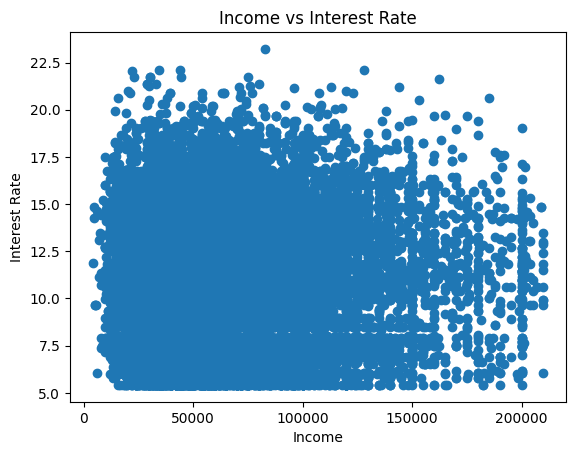

In [69]:
plt.scatter(df_4['person_income'],df_4['loan_int_rate'])
plt.xlabel('Income')
plt.ylabel('Interest Rate')
plt.title('Income vs Interest Rate')
plt.show()

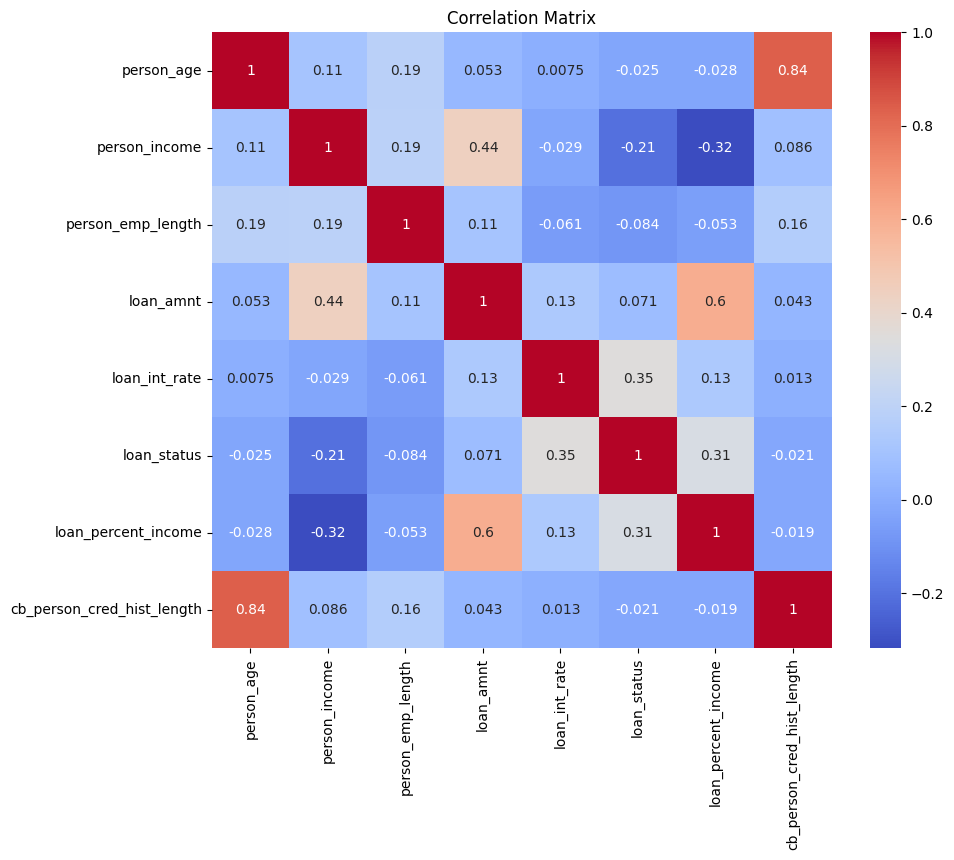

In [90]:
# Correlation matrix
numeric_columns = df_4.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
#Pairplot
sns.pairplot(df_4, hue='loan_status')
plt.show()

# OneHotEncoder

In [110]:
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [113]:
df_5 = pd.get_dummies(df, columns=categorical_features)


In [114]:
df_5.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,False,False,...,False,False,False,False,True,False,False,False,False,True
1,21,9600,5.0,1000,11.14,0,0.10,2,False,False,...,False,False,True,False,False,False,False,False,True,False
2,25,9600,1.0,5500,12.87,1,0.57,3,True,False,...,False,False,False,True,False,False,False,False,True,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,False,False,False,True,False,False,False,False,True,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,False,False,False,True,False,False,False,False,False,True


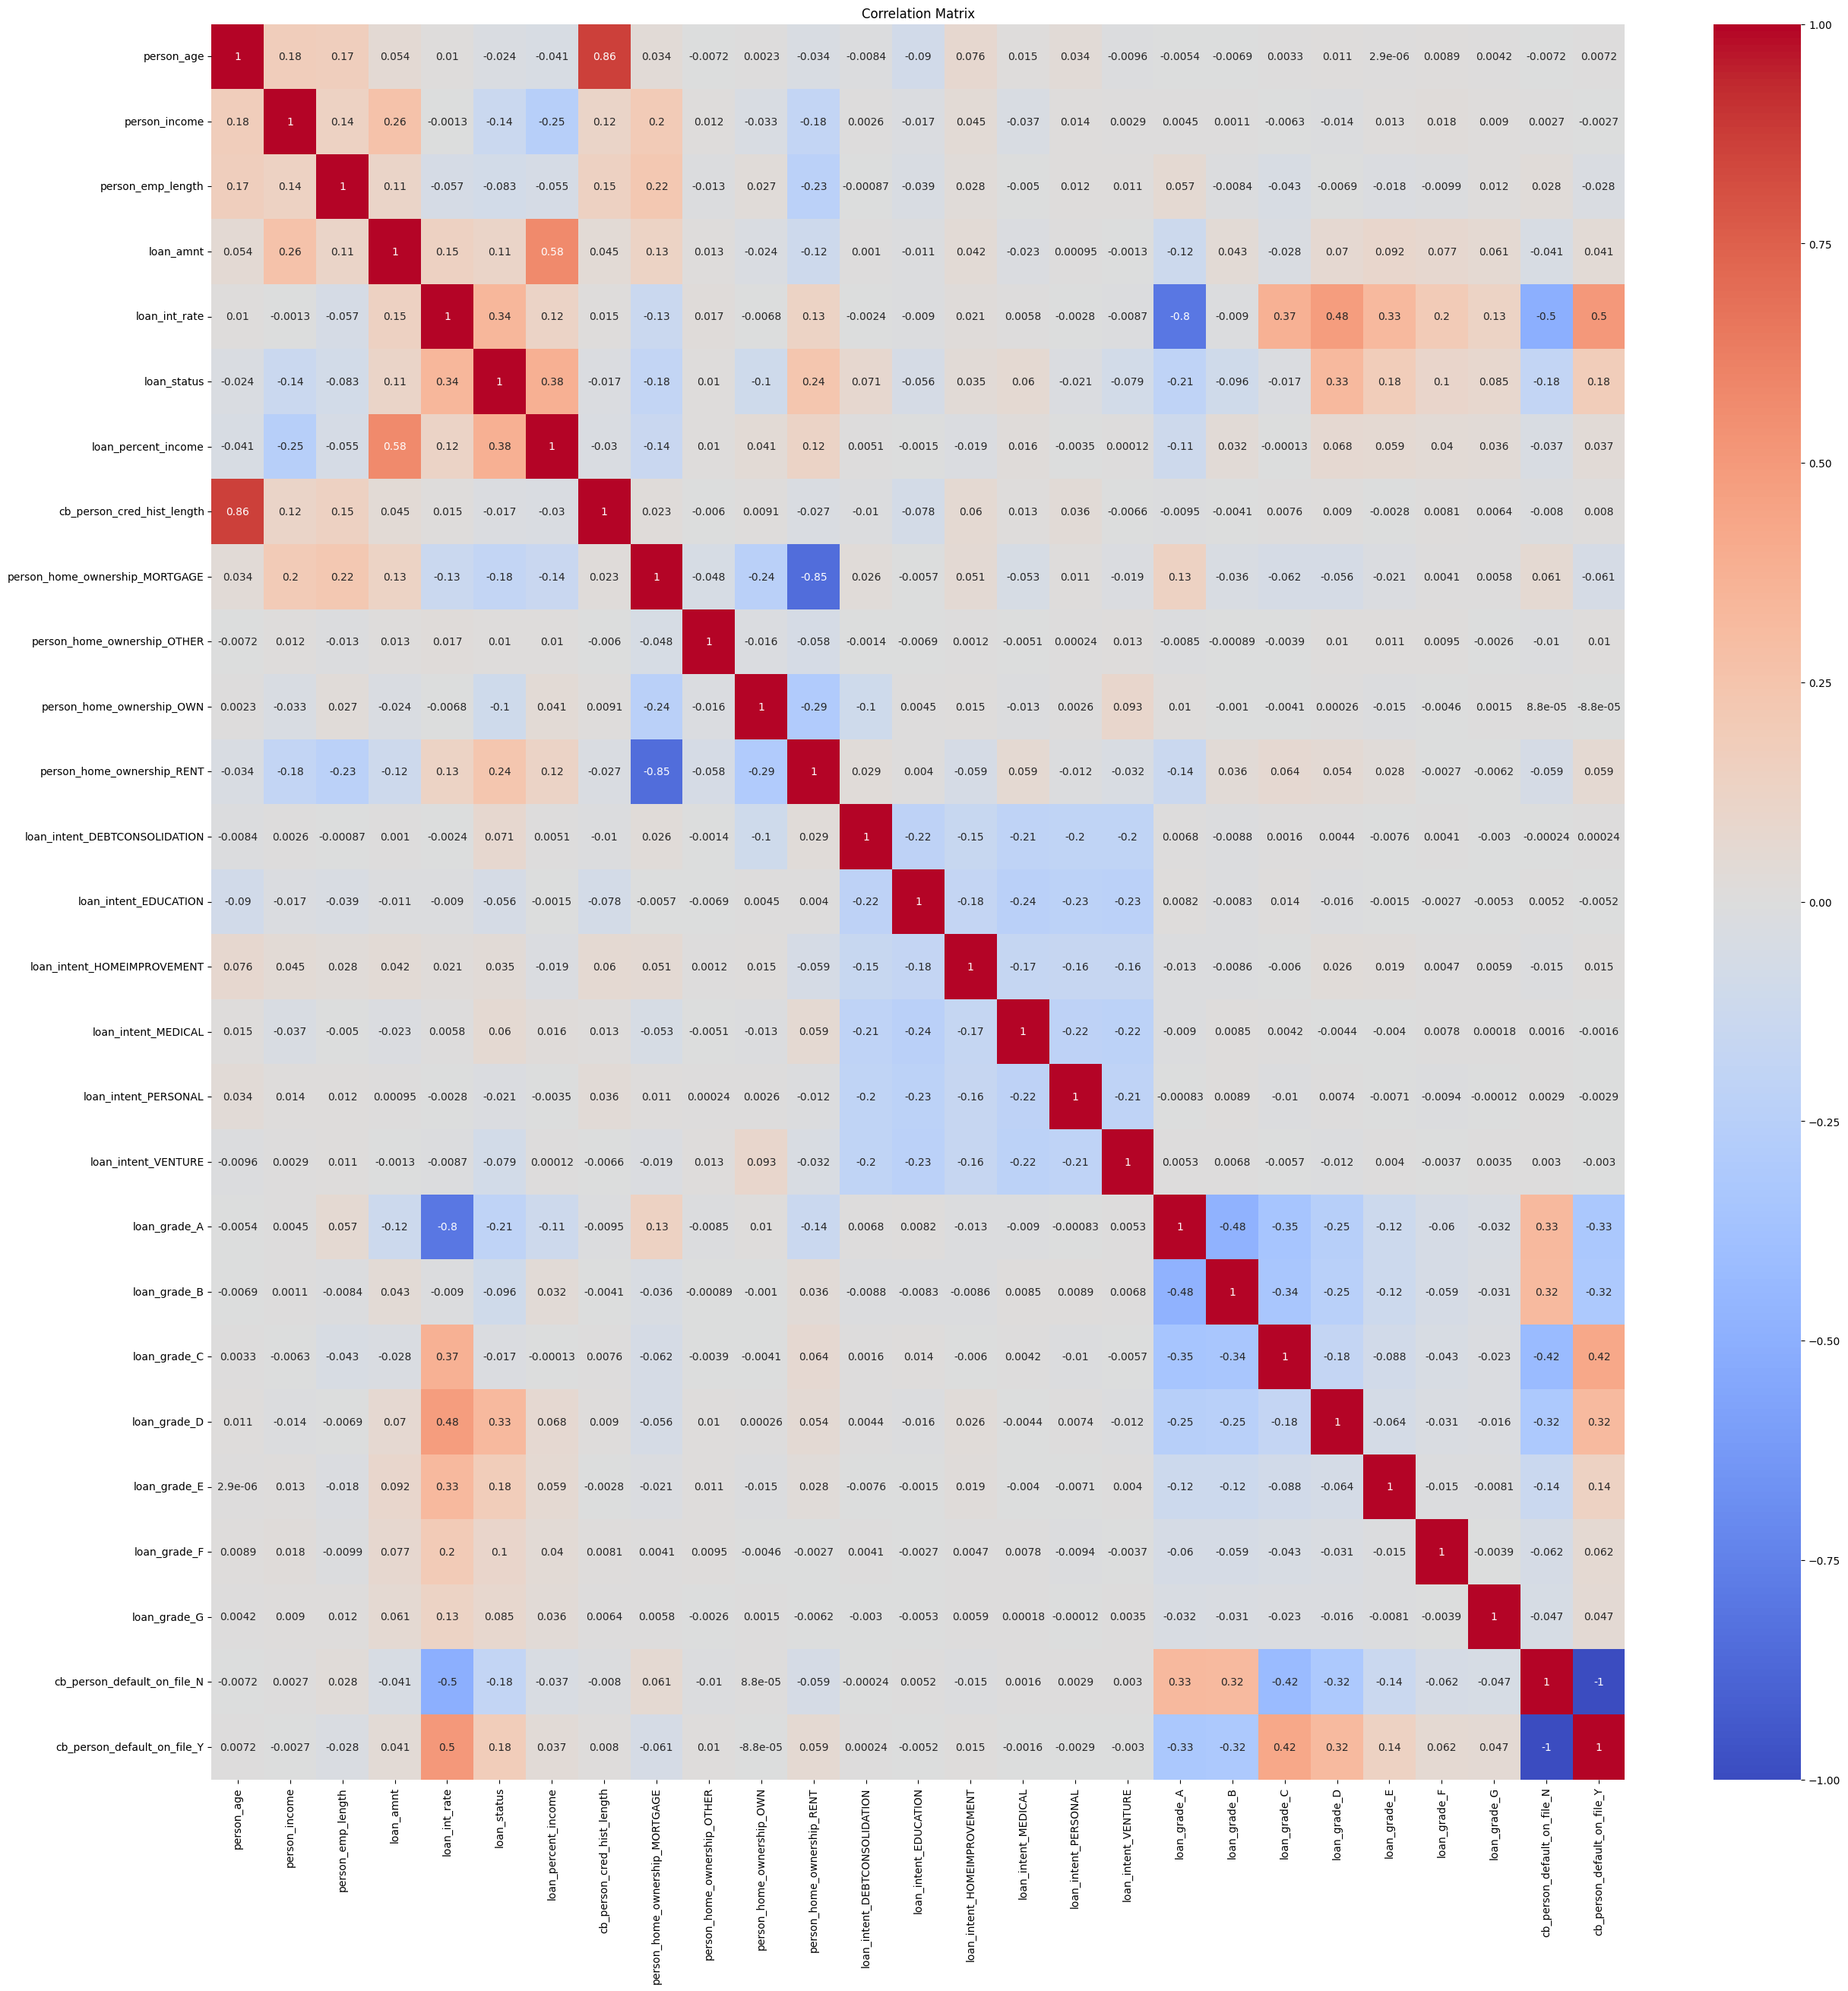

In [115]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_5.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#Model Building

In [116]:
# Split the data into features and target
X = df_5.drop('loan_status', axis=1) #features
y = df_5['loan_status']  #target

In [118]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Logistic Regression

In [121]:
# Fit model
clt.fit(X_train, y_train)

LogisticRegression()

In [126]:
from sklearn.metrics import confusion_matrix, classification_report

In [127]:
#Model evaluation
y_pred_clt= clt.predict(X_test)
print(confusion_matrix(y_test, y_pred_clt))
print(classification_report(y_test, y_pred_clt))

[[4369   72]
 [1051  209]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      4441
           1       0.74      0.17      0.27      1260

    accuracy                           0.80      5701
   macro avg       0.77      0.57      0.58      5701
weighted avg       0.79      0.80      0.75      5701



#Decision Tree Classifier

In [130]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [132]:
# Fit model
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [133]:
#Model evaluation
y_pred_dtc= dtc.predict(X_test)
print(confusion_matrix(y_test, y_pred_dtc))
print(classification_report(y_test, y_pred_dtc))

[[4105  336]
 [ 318  942]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      4441
           1       0.74      0.75      0.74      1260

    accuracy                           0.89      5701
   macro avg       0.83      0.84      0.83      5701
weighted avg       0.89      0.89      0.89      5701



#  MLP Classifier


In [140]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier()
# Fit model
mlpc.fit(X_train, y_train)
#Model evaluation
y_pred_mlpc = mlpc.predict(X_test)
print(confusion_matrix(y_test, y_pred_mlpc))
print(classification_report(y_test, y_pred_mlpc))


[[4136  305]
 [ 608  652]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4441
           1       0.68      0.52      0.59      1260

    accuracy                           0.84      5701
   macro avg       0.78      0.72      0.74      5701
weighted avg       0.83      0.84      0.83      5701



#KNeighborsClassifier


In [141]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
# Fit model
knc.fit(X_train, y_train)
#Model evaluation
y_pred_knc = knc.predict(X_test)
print(confusion_matrix(y_test, y_pred_knc))
print(classification_report(y_test, y_pred_knc))


[[4135  306]
 [ 640  620]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4441
           1       0.67      0.49      0.57      1260

    accuracy                           0.83      5701
   macro avg       0.77      0.71      0.73      5701
weighted avg       0.82      0.83      0.82      5701

